# STAT207 Final Project - 2022-2023 NBA Player Stats | Playoffs


Jason Choe,
*Michael Gergeni,
Matthew Gong

In [210]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## 1. Introduction

Our final project focuses on superstars in today's NBA - the best of the best in terms of basketball players - and how they perform in the playoffs. We are going to build a predictive model that correctly predicts if an NBA player that played in the playoffs is a superstar or not for new datasets. The people who would benefit most from this dataset would be sports analysts, agents for players, and general managers of NBA teams. As the salary caps increase, player contracts - especially for superstars - move up into the range of hundreds of millions of dollars (Raman, 2023). For the people that make and receive these contracts, this is no small decision, as a bad contract can ruin a franchise and bankrupt an owner - as the $100 million contract for Allan Houston did, a contract so bad that the NBA had to create a rule named after him to help out franchises who signed deals as bad (McGowan, 2020). When done well, however, a good contract wins championships and establishes a legacy - our model can be used to predict which players are real superstars that can win the most important games of the season, and which aren't.

We believe that these people would desire an equally high positive and a negative accuracy for our response variable - a high true positive rate would mean more correctly identified superstars and, by effect, correctly paid contracts, and a high true negative rate means that there are more correctly identified non-superstars and hopefully less bad contracts.


Primary research goal: Build a predictive model that will effectivley predict superstar status for new datasets
Secondary research goals: We would like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset. Also, we would like to thoroughly describe the nature of the variables as well as the relationship between the variables that we are using in our model. These descriptive analytics techniques that we use should be interpreted in the context of your primary research goal.

## 2. Dataset Discussion

This dataset is from NBAStuffer (https://www.nbastuffer.com/2022-2023-nba-player-stats/, accessible from that link), a basketball statistics website. Our specific dataset is from the NBA 2022-2023 NBA Player Stats but from the playoffs. It contains information on players that participated in the playoffs that year. We downloaded this .csv file on 4/24/24. The rows in this dataset represent every player in the NBA that got playing time in the 2022-23 NBA Playoffs. This dataset is very good at including all observations that could be included for stats in an NBA Playoffs game. It gives us averages but does not give us specific game stats. This impacts the types of actions that someone who is using this model as it is a generalization and follows trends. It will not be able to predict perfectly. The data we are using might not include current superstars that did not make the playoffs either. Our response variable as explained above is whether a player is considered a superstar player. For this, we will use the metric of PPG (points per game) scored by a player. If a player has a PPG (Points Per Game) >= 22, we are determining them to be a superstar. The 5 explanatory variables we intend to use in our model are RPG, APG, POS, 3P%, MPG. RPG is the rebounds a player gets per game on average. APG is the assists they get per game on average. POS (Position) is the position that a player plays among the six commonly recognized positions in an NBA game: the three main positions - Guard (G), Forward (F), Center (C) - as well as three combo positions, such as Stretch Fives (C-F), Stretch Fours (F-G), and Combo Guards (G-F). 3P% is the percentage of 3-point shots that a player makes in a game. MPG is the minutes per game that a player plays on average. 

In [211]:
df = pd.read_csv('nba.csv')
df.head()

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,Kawhi Leonard,Lac,F,32.0,2,40.2,30.0,11.9,17,0.882,...,6.0,2.0,0.5,3.0,41.0,40.5,47.0,11.0,129.4,110.8
1,Devin Booker,Pho,G,26.6,11,41.7,29.0,11.7,67,0.866,...,7.2,1.7,0.8,2.9,38.5,40.9,45.7,10.1,130.7,110.0
2,Anthony Edwards,Min,G,21.9,5,39.7,32.4,6.5,39,0.846,...,5.2,1.8,2.0,1.6,36.6,36.8,41.8,9.4,122.1,111.0
3,Stephen Curry,Gol,G,35.2,13,37.9,31.6,11.9,58,0.845,...,6.1,1.0,0.5,3.2,35.6,36.5,41.7,10.4,112.4,112.0
4,Nikola Jokic,Den,C,28.3,20,39.4,31.2,14.5,139,0.799,...,9.5,1.1,1.0,3.5,43.5,39.5,53.0,15.9,127.1,104.5


In [212]:
df.shape[0]

217

We have 217 rows in our dataset before any data cleaning

## 3. Dataset Cleaning

Our dataset does not have any implicit values. When we identified if there were any rows where there were null values we just decided to drop that row. We did this as we identified those players had very limited playing time and did not have any stats to report for it. Therefore it would be appropriate for us drop them as their minute restrictions per game does not give them the capacity to be a superstar. In addition to this, we dropped players with less than 4 games played, as their data, although valuable, is too small of a sample to fully evaluate the player and often skews our results towards those players. The pros of using this missing values technique is that it correctly eliminates players who have not produced enough statistics to even be considered a superstar and for the PPG they have. A con for this technique is that it may take away from the bigger picure and we are leaving out important data points that our predictive model may need.

In [213]:
df.dtypes

NAME      object
TEAM      object
POS       object
AGE      float64
GP         int64
MPG      float64
USG%     float64
TO%      float64
FTA        int64
FT%      float64
2PA        int64
2P%      float64
3PA        int64
3P%      float64
eFG%     float64
TS%      float64
PPG      float64
RPG      float64
APG      float64
SPG      float64
BPG      float64
TPG      float64
P+R      float64
P+A      float64
P+R+A    float64
VI       float64
ORtg     float64
DRtg     float64
dtype: object

In [214]:
df1 = df.dropna()
df1

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,Kawhi Leonard,Lac,F,32.0,2,40.2,30.0,11.9,17,0.882,...,6.0,2.0,0.5,3.0,41.0,40.5,47.0,11.0,129.4,110.8
1,Devin Booker,Pho,G,26.6,11,41.7,29.0,11.7,67,0.866,...,7.2,1.7,0.8,2.9,38.5,40.9,45.7,10.1,130.7,110.0
2,Anthony Edwards,Min,G,21.9,5,39.7,32.4,6.5,39,0.846,...,5.2,1.8,2.0,1.6,36.6,36.8,41.8,9.4,122.1,111.0
3,Stephen Curry,Gol,G,35.2,13,37.9,31.6,11.9,58,0.845,...,6.1,1.0,0.5,3.2,35.6,36.5,41.7,10.4,112.4,112.0
4,Nikola Jokic,Den,C,28.3,20,39.4,31.2,14.5,139,0.799,...,9.5,1.1,1.0,3.5,43.5,39.5,53.0,15.9,127.1,104.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Jordan McLaughlin,Min,G,27.2,2,7.1,13.1,0.0,0,0.000,...,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,33.0,104.4
208,Patty Mills,Bro,G,34.8,1,5.3,18.6,0.0,0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.8
209,Josh Minott,Min,F,20.5,1,6.3,14.7,50.0,0,0.000,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,88.3
213,Ricky Rubio,Cle,G,32.6,3,5.7,16.6,83.3,0,0.000,...,1.0,0.3,0.0,1.7,2.0,1.0,3.0,0.0,46.2,76.1


In [215]:
df1 = df1[df1["GP"] >= 4]
df1

,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
1,Devin Booker,Pho,G,26.6,11,41.7,29.0,11.7,67,0.866,...,7.2,1.7,0.8,2.9,38.5,40.9,45.7,10.1,130.7,110.0
2,Anthony Edwards,Min,G,21.9,5,39.7,32.4,6.5,39,0.846,...,5.2,1.8,2.0,1.6,36.6,36.8,41.8,9.4,122.1,111.0
3,Stephen Curry,Gol,G,35.2,13,37.9,31.6,11.9,58,0.845,...,6.1,1.0,0.5,3.2,35.6,36.5,41.7,10.4,112.4,112.0
4,Nikola Jokic,Den,C,28.3,20,39.4,31.2,14.5,139,0.799,...,9.5,1.1,1.0,3.5,43.5,39.5,53.0,15.9,127.1,104.5
5,Trae Young,Atl,G,24.7,6,38.4,34.4,13.8,43,0.860,...,10.2,1.7,0.7,4.0,32.8,39.3,43.0,10.8,109.0,115.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Tristan Thompson,Lal,C-F,32.3,6,5.4,19.4,8.3,5,0.200,...,0.3,0.0,0.0,0.2,3.5,2.2,3.8,7.2,98.5,113.0
170,Jevon Carter,Mil,G,27.7,4,12.3,7.7,0.0,0,0.000,...,1.0,0.3,0.0,0.0,2.3,2.3,3.3,3.5,85.0,115.4
180,Danny Green,Cle,G,36.0,4,9.9,8.3,28.6,0,0.000,...,0.3,0.5,0.3,0.5,2.5,1.0,2.8,3.1,69.5,93.2
181,John Konchar,Mem,G,27.2,5,9.7,8.6,10.0,0,0.000,...,0.8,0.4,0.4,0.2,2.8,1.6,3.6,4.5,85.5,102.1


In [216]:
len(df)-len(df1)

62

In [217]:
df1["POS"].value_counts()

POS
G      62
F      41
F-C    14
G-F    12
C      11
C-F     8
F-G     7
Name: count, dtype: int64

We dropped 62 rows total between the blank entry drops and the games played restrictions.

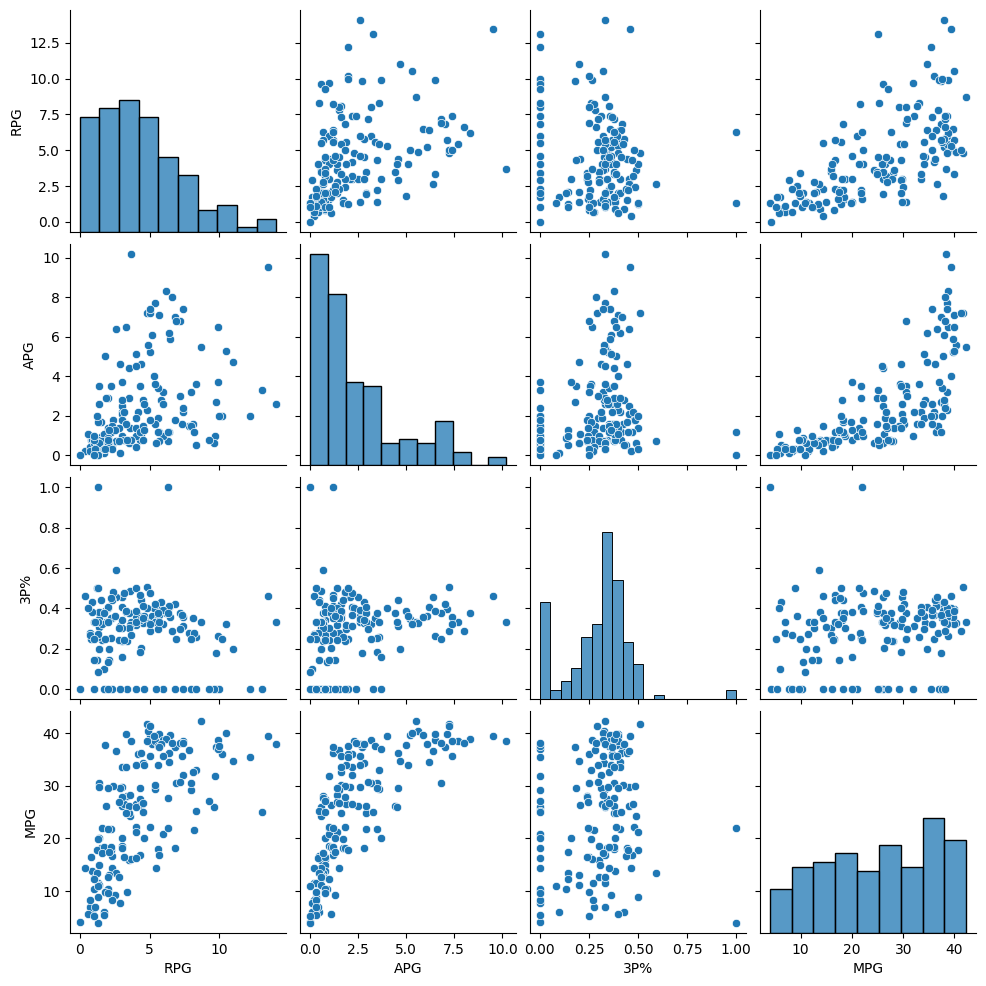

In [218]:
sns.pairplot(df1[["RPG", "APG", "POS", "3P%", "MPG"]])

We can see here a scatterplot for every pair of numerical explanatory variables. Our first pair of variables are RPG and APG. Here we see generally a postive linear relationship. This makes sense as you play in a game you should be accumulating both rebounds and assists regardless of what position you play. I would not drop any outliers here. Next is RPG and 3P%, here we see no linear relationship between the two whatsoever. Next we see that RPG and MPG have a positive linear relationship and this is correct as the longer you play in a game you should have more RPG as well. Next we see APG and 3P%. Here we see no relationship between the two. APG and MPG have a positive linear relationship. This is correct because as you progress and play in the game longer you should be getting more opportunities to get assists. 3P% and MPG does not have a linear relationship. 
We would not drop any outliers that we have in this dataset as we believe it would take away important data points that we should use in our analysis for this model. We have already cleaned the dataset and dropped multiple rows.

## 4. Preliminary Analysis

Next, we are going to create a dataframe with our explanatory variables and our response variable. With our response variable, we are going to turn it into a categorical variable with two distinct values, with values greater than or equal to 22 PPG equal to our desired superstar status and values under 22 not (represented by true and false respectively).

In [219]:
df2 = df1[["PPG", "RPG", "APG", "POS", "3P%", "MPG"]]
df2

,PPG,RPG,APG,POS,3P%,MPG
1,33.7,4.8,7.2,G,0.508,41.7
2,31.6,5.0,5.2,G,0.349,39.7
3,30.5,5.2,6.1,G,0.363,37.9
4,30.0,13.5,9.5,C,0.461,39.4
5,29.2,3.7,10.2,G,0.333,38.4
...,...,...,...,...,...,...
167,1.8,1.7,0.3,C-F,0.000,5.4
170,1.3,1.0,1.0,G,0.143,12.3
180,0.8,1.8,0.3,G,0.250,9.9
181,0.8,2.0,0.8,G,0.000,9.7


In [220]:
df2["is_superstar"] = 1 * (df2["PPG"] >= 22.0)
df2

/var/folders/b8/rzk2fb1j78v6mc6qykvt3_qc0000gn/T/ipykernel_7548/44895542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["is_superstar"] = 1 * (df2["PPG"] >= 22.0)


,PPG,RPG,APG,POS,3P%,MPG,is_superstar
1,33.7,4.8,7.2,G,0.508,41.7,1
2,31.6,5.0,5.2,G,0.349,39.7,1
3,30.5,5.2,6.1,G,0.363,37.9,1
4,30.0,13.5,9.5,C,0.461,39.4,1
5,29.2,3.7,10.2,G,0.333,38.4,1
...,...,...,...,...,...,...,...
167,1.8,1.7,0.3,C-F,0.000,5.4,0
170,1.3,1.0,1.0,G,0.143,12.3,0
180,0.8,1.8,0.3,G,0.250,9.9,0
181,0.8,2.0,0.8,G,0.000,9.7,0


In [221]:
df2["superstar"] = df2["is_superstar"].replace({1 : "t", 0 : "f"})
df2

/var/folders/b8/rzk2fb1j78v6mc6qykvt3_qc0000gn/T/ipykernel_7548/354745515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["superstar"] = df2["is_superstar"].replace({1 : "t", 0 : "f"})


,PPG,RPG,APG,POS,3P%,MPG,is_superstar,superstar
1,33.7,4.8,7.2,G,0.508,41.7,1,t
2,31.6,5.0,5.2,G,0.349,39.7,1,t
3,30.5,5.2,6.1,G,0.363,37.9,1,t
4,30.0,13.5,9.5,C,0.461,39.4,1,t
5,29.2,3.7,10.2,G,0.333,38.4,1,t
...,...,...,...,...,...,...,...,...
167,1.8,1.7,0.3,C-F,0.000,5.4,0,f
170,1.3,1.0,1.0,G,0.143,12.3,0,f
180,0.8,1.8,0.3,G,0.250,9.9,0,f
181,0.8,2.0,0.8,G,0.000,9.7,0,f


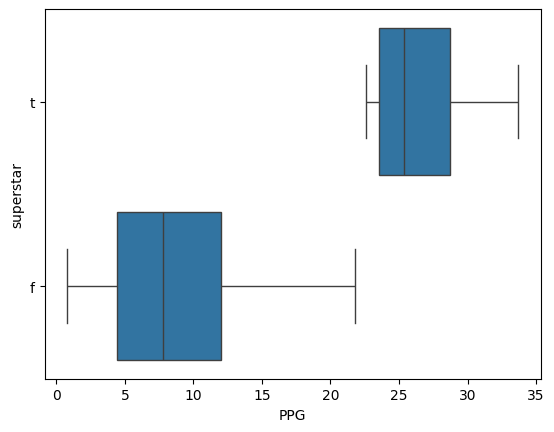

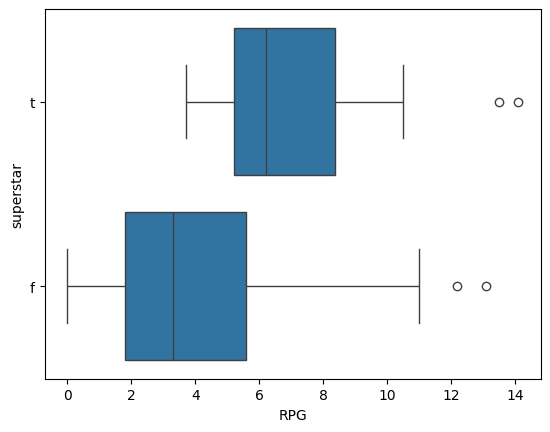

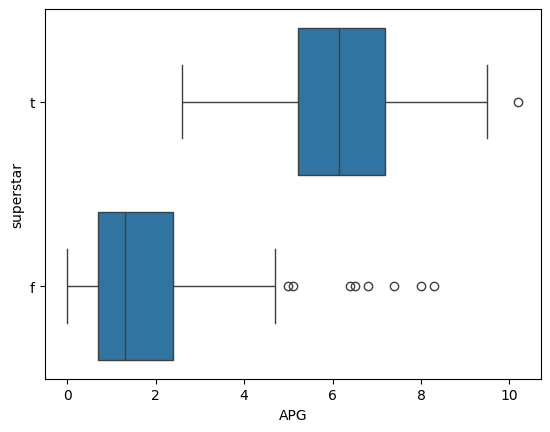

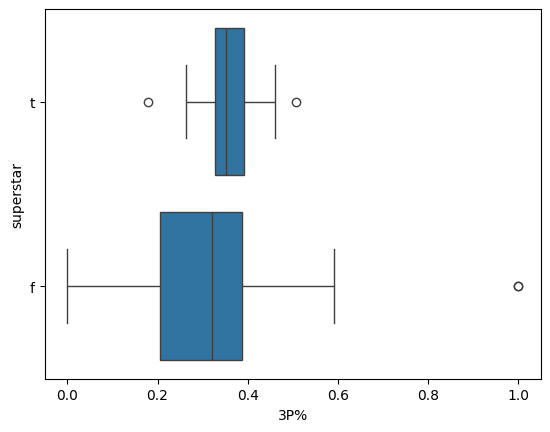

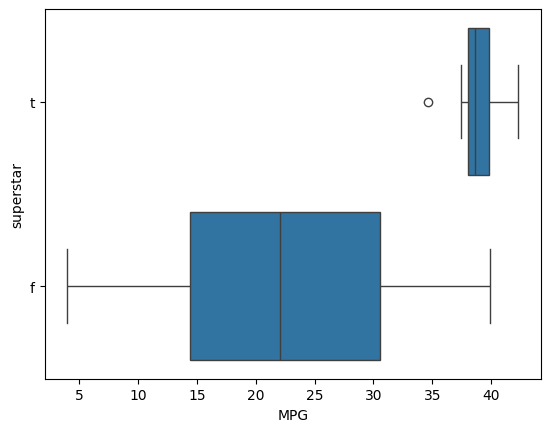

In [222]:
num_cols = df2.select_dtypes('number').columns
for col in num_cols.drop('is_superstar'):
    temp = sns.boxplot(x=df2[col], y=df2['superstar'], data=df2)
    plt.show()

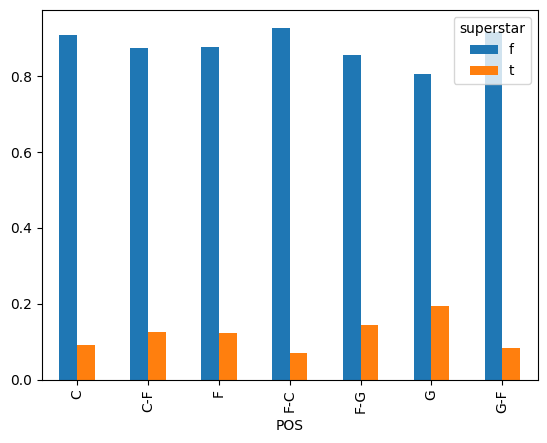

In [223]:
cat_cols = df2.select_dtypes('object').columns
for col in cat_cols.drop('superstar'):
    temp = pd.crosstab(df2[col], df2["superstar"],
                       normalize='index')
    temp.plot.bar()
    plt.show()

Above are graphs of the relationship between each of our explanatory variables and our response variable. All of our explanatory variables seem to have an association with the response variable, though the strongest associations seem to be with PPG, APG, and MPG. In all three cases, the IQR of superstars rests completely above the IQR of non-superstars, and in the case of PPG and APG, above the 95th percentile of non-superstars. The medians of each variable, as well, range widely between superstars and non-superstars. Although all variables have a sizable association, the weakest of our explanatory variables seems to be that of 3P%, whose superstar IQR overlaps almost entirely with the non-superstar IQR, with somewhat similar medians. 

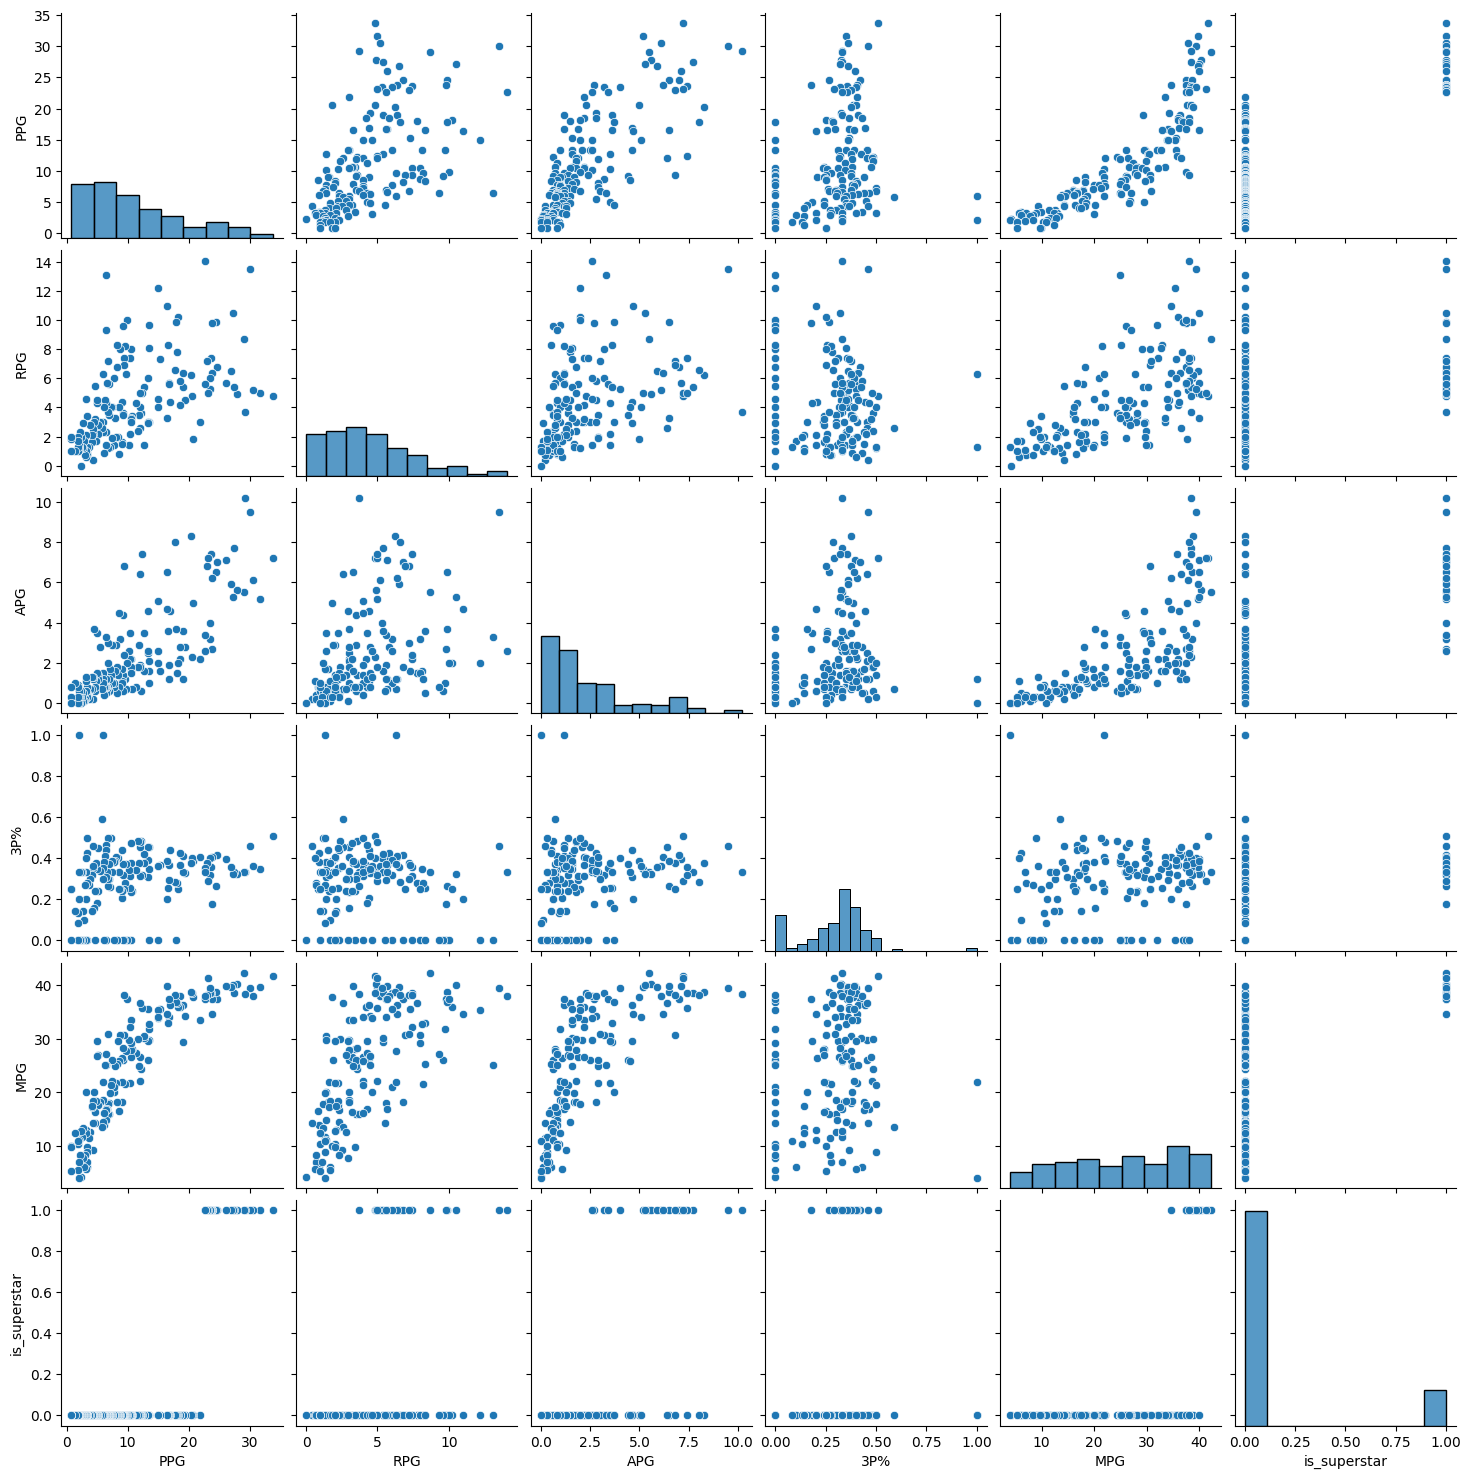

In [ ]:
sns.pairplot(df2)

In [225]:
df2[["RPG", "APG", "3P%", "MPG"]].corr()

,RPG,APG,3P%,MPG
RPG,1.000000,0.397414,-0.189095,0.647404
APG,0.397414,1.000000,0.184841,0.726229
3P%,-0.189095,0.184841,1.000000,0.148809
MPG,0.647404,0.726229,0.148809,1.000000


Upon further analysis of the relationship between our explanatory variables, we see a strong relationship between APG (Assists Per Game) and MPG (Minutes Per Game), implying a degree of multicollinearity. This can be seen from the linear relationship demonstrated in the pair plot and their high correlation value (0.726229 > 0.7).

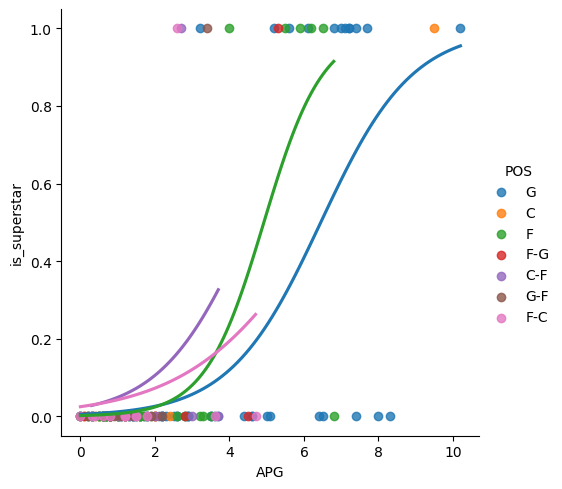

In [226]:
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
warnings.filterwarnings("ignore", category=PerfectSeparationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
sns.lmplot(x="APG", 
           y="is_superstar",
           hue="POS",
           data= df2,
           logistic=True,
           ci=False)
plt.show()


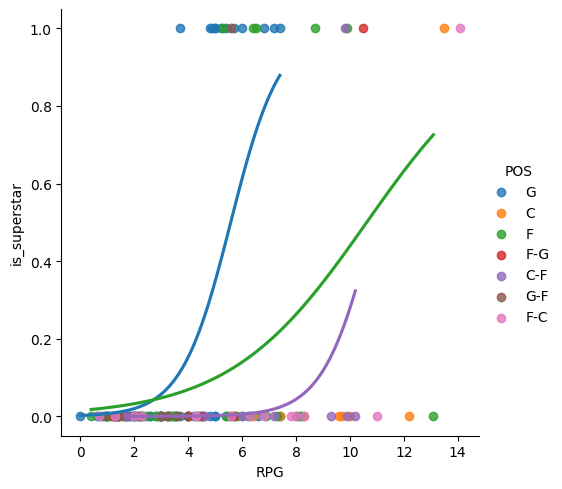

In [227]:
sns.lmplot(x="RPG", 
           y="is_superstar",
           hue="POS",
           data= df2,
           logistic=True,
           ci=False)
plt.show()

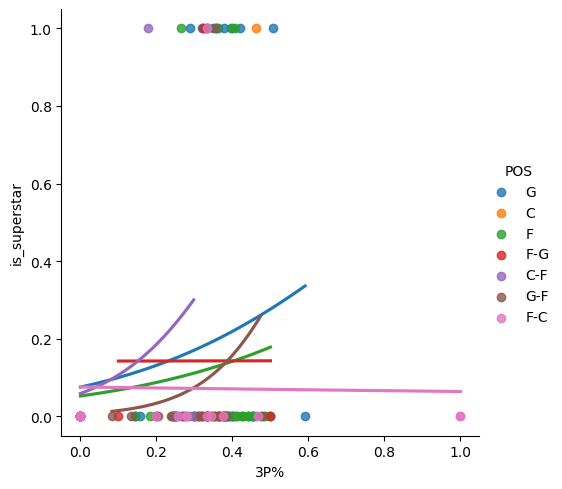

In [228]:
sns.lmplot(x="3P%", 
           y="is_superstar",
           hue="POS",
           data= df2,
           logistic=True,
           ci=False)
plt.show()

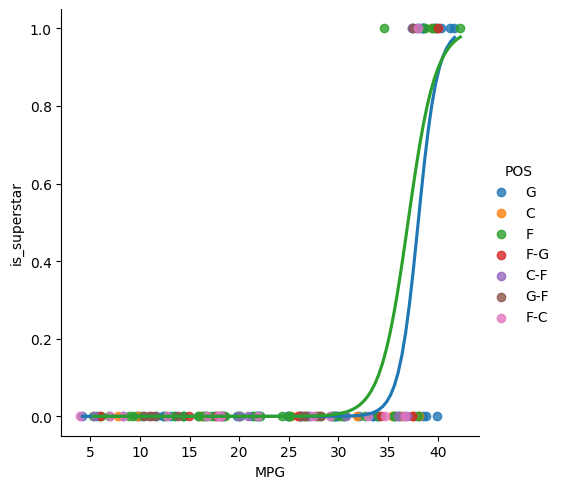

In [229]:
sns.lmplot(x="MPG", 
           y="is_superstar",
           hue="POS",
           data= df2,
           logistic=True,
           ci=False)
plt.show()

All of our numerical explanatory variables appear to have strong interactions with our categorical explanatory variable, seen from the varying slopes for different values of the categorical variable. The strongest interaction of these appears to be in 3P%, where we see several slopes heading in different directions, especially for F-Gs and F-Cs, due to a lack of presence as superstars.

## 5. Model Data Preprocessing

In [230]:
df2

,PPG,RPG,APG,POS,3P%,MPG,is_superstar,superstar
1,33.7,4.8,7.2,G,0.508,41.7,1,t
2,31.6,5.0,5.2,G,0.349,39.7,1,t
3,30.5,5.2,6.1,G,0.363,37.9,1,t
4,30.0,13.5,9.5,C,0.461,39.4,1,t
5,29.2,3.7,10.2,G,0.333,38.4,1,t
...,...,...,...,...,...,...,...,...
167,1.8,1.7,0.3,C-F,0.000,5.4,0,f
170,1.3,1.0,1.0,G,0.143,12.3,0,f
180,0.8,1.8,0.3,G,0.250,9.9,0,f
181,0.8,2.0,0.8,G,0.000,9.7,0,f


Next, we are going to create a features matrix and target array for our data.

In [231]:
fm = df2[["RPG", "APG", "POS", "3P%", "MPG"]]
fm

,RPG,APG,POS,3P%,MPG
1,4.8,7.2,G,0.508,41.7
2,5.0,5.2,G,0.349,39.7
3,5.2,6.1,G,0.363,37.9
4,13.5,9.5,C,0.461,39.4
5,3.7,10.2,G,0.333,38.4
...,...,...,...,...,...
167,1.7,0.3,C-F,0.000,5.4
170,1.0,1.0,G,0.143,12.3
180,1.8,0.3,G,0.250,9.9
181,2.0,0.8,G,0.000,9.7


In [232]:
fm_num = df2[["RPG", "APG", "3P%", "MPG"]]
fm_num

,RPG,APG,3P%,MPG
1,4.8,7.2,0.508,41.7
2,5.0,5.2,0.349,39.7
3,5.2,6.1,0.363,37.9
4,13.5,9.5,0.461,39.4
5,3.7,10.2,0.333,38.4
...,...,...,...,...
167,1.7,0.3,0.000,5.4
170,1.0,1.0,0.143,12.3
180,1.8,0.3,0.250,9.9
181,2.0,0.8,0.000,9.7


In [233]:
ta = df2["is_superstar"]
ta

1      1
2      1
3      1
4      1
5      1
      ..
167    0
170    0
180    0
181    0
182    0
Name: is_superstar, Length: 155, dtype: int64

In [234]:
fm_num.std()

RPG     2.955580
APG     2.256149
3P%     0.166041
MPG    10.816880
dtype: float64

In [235]:
scaler_training = StandardScaler()
scaled_evars = scaler_training.fit_transform(fm_num)
fm_scaled = pd.DataFrame(scaled_evars, columns=fm_num.columns)
fm_scaled.head()

,RPG,APG,3P%,MPG
0,0.128549,2.123227,1.263505,1.540810
1,0.196437,1.233887,0.302808,1.355314
2,0.264325,1.634090,0.387397,1.188368
3,3.081675,3.145968,0.979525,1.327490
4,-0.244835,3.457237,0.206134,1.234742


In [236]:
fm_cat = fm[["POS"]]
dummies = pd.get_dummies(fm_cat, drop_first=True)
dummies.head()

,POS_C-F,POS_F,POS_F-C,POS_F-G,POS_G,POS_G-F
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [237]:
fm = pd.concat([fm_scaled, dummies], axis = 1)
fm = fm.dropna()
fm

,RPG,APG,3P%,MPG,POS_C-F,POS_F,POS_F-C,POS_F-G,POS_G,POS_G-F
1,0.196437,1.233887,0.302808,1.355314,False,False,False,False,True,False
2,0.264325,1.634090,0.387397,1.188368,False,False,False,False,True,False
3,3.081675,3.145968,0.979525,1.327490,False,False,False,False,True,False
4,-0.244835,3.457237,0.206134,1.234742,False,False,False,False,False,False
5,1.452364,1.367288,0.206134,1.596458,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
144,-1.059490,-1.078396,4.236228,-1.955781,False,False,False,False,True,False
148,-1.161322,-0.722660,-1.805892,-1.371470,False,False,False,True,False,False
150,-0.923714,-0.944995,-1.805892,-1.825934,False,False,False,False,False,False
151,-1.161322,-0.633726,-0.941869,-1.185975,False,True,False,False,False,False


In [238]:
df2 = pd.concat([fm, ta], axis = 1)
df2 = df2.dropna()
df2

,RPG,APG,3P%,MPG,POS_C-F,POS_F,POS_F-C,POS_F-G,POS_G,POS_G-F,is_superstar
1,0.196437,1.233887,0.302808,1.355314,False,False,False,False,True,False,1
2,0.264325,1.634090,0.387397,1.188368,False,False,False,False,True,False,1
3,3.081675,3.145968,0.979525,1.327490,False,False,False,False,True,False,1
4,-0.244835,3.457237,0.206134,1.234742,False,False,False,False,False,False,1
5,1.452364,1.367288,0.206134,1.596458,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
144,-1.059490,-1.078396,4.236228,-1.955781,False,False,False,False,True,False,0
148,-1.161322,-0.722660,-1.805892,-1.371470,False,False,False,True,False,False,0
150,-0.923714,-0.944995,-1.805892,-1.825934,False,False,False,False,False,False,0
151,-1.161322,-0.633726,-0.941869,-1.185975,False,True,False,False,False,False,0


In [239]:
ta = df2["is_superstar"]
ta

1      1
2      1
3      1
4      1
5      1
      ..
144    0
148    0
150    0
151    0
153    0
Name: is_superstar, Length: 141, dtype: int64

In [240]:
df2 = df2.rename(columns={"POS_C-F": "POSCF", "POS_F": "POSF", "POS_F-C": "POSFC", "POS_F-G": "POSFG", "POS_G": "POSG", "POS_G-F": "POSGF", "3P%": "TPpct"})
df2

,RPG,APG,TPpct,MPG,POSCF,POSF,POSFC,POSFG,POSG,POSGF,is_superstar
1,0.196437,1.233887,0.302808,1.355314,False,False,False,False,True,False,1
2,0.264325,1.634090,0.387397,1.188368,False,False,False,False,True,False,1
3,3.081675,3.145968,0.979525,1.327490,False,False,False,False,True,False,1
4,-0.244835,3.457237,0.206134,1.234742,False,False,False,False,False,False,1
5,1.452364,1.367288,0.206134,1.596458,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
144,-1.059490,-1.078396,4.236228,-1.955781,False,False,False,False,True,False,0
148,-1.161322,-0.722660,-1.805892,-1.371470,False,False,False,True,False,False,0
150,-0.923714,-0.944995,-1.805892,-1.825934,False,False,False,False,False,False,0
151,-1.161322,-0.633726,-0.941869,-1.185975,False,True,False,False,False,False,0


In [241]:
fm = fm.rename(columns={"POS_C-F": "POSCF", "POS_F": "POSF", "POS_F-C": "POSFC", "POS_F-G": "POSFG", "POS_G": "POSG", "POS_G-F": "POSGF", "3P%": "TPpct"})
fm

,RPG,APG,TPpct,MPG,POSCF,POSF,POSFC,POSFG,POSG,POSGF
1,0.196437,1.233887,0.302808,1.355314,False,False,False,False,True,False
2,0.264325,1.634090,0.387397,1.188368,False,False,False,False,True,False
3,3.081675,3.145968,0.979525,1.327490,False,False,False,False,True,False
4,-0.244835,3.457237,0.206134,1.234742,False,False,False,False,False,False
5,1.452364,1.367288,0.206134,1.596458,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
144,-1.059490,-1.078396,4.236228,-1.955781,False,False,False,False,True,False
148,-1.161322,-0.722660,-1.805892,-1.371470,False,False,False,True,False,False
150,-0.923714,-0.944995,-1.805892,-1.825934,False,False,False,False,False,False
151,-1.161322,-0.633726,-0.941869,-1.185975,False,True,False,False,False,False


Above, we scaled our numerical explanatory variables to help meet our second research goal of model interpretability, since we are then able to later look at the magntiude of our regression slopes and relate them to their strengths in predicting our response variable. Additionally, we translated our categorical variables into indicator variables, and we changed the names of our categorical columns to make them easier to recognize/work with.

## 6. Feature Selection with k-Fold Cross-Validation

In this step, we are going to do features selection, more specifically backwards elimination with cross-validation. Our goal is to select the logistic regression model with the highest average test AUC in the k=5 folds validation. We will be using a random_state of 100 also.

In [242]:
model_logit = LogisticRegression()
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
cross_val

KFold(n_splits=5, random_state=100, shuffle=True)

In [243]:
full_mod1 = fm[["RPG","APG","TPpct","MPG","POSCF","POSF","POSFC","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, full_mod1, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9494545454545454

In [244]:
back_mod1 = fm[["APG","TPpct","MPG","POSCF","POSF","POSFC","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod1, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9465925925925927

In [245]:
back_mod2 = fm[["RPG","TPpct","MPG","POSCF","POSF","POSFC","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod2, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.93303367003367

In [246]:
back_mod3 = fm[["RPG","APG","MPG","POSCF","POSF","POSFC","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod3, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9509696969696971

In [247]:
back_mod4 = fm[["RPG","APG","TPpct","POSCF","POSF","POSFC","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod4, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9168939393939393

In [248]:
back_mod5 = fm[["RPG","APG","TPpct","MPG","POSF","POSFC","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod5, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9494545454545454

In [249]:
back_mod6 = fm[["RPG","APG","TPpct","MPG","POSCF","POSFC","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod6, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9536363636363635

In [250]:
back_mod7 = fm[["RPG","APG","TPpct","MPG","POSCF","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9574545454545454

In [251]:
back_mod8 = fm[["RPG","APG","TPpct","MPG","POSCF","POSF","POSFC","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod8, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9494545454545454

In [252]:
back_mod9 = fm[["RPG","APG","TPpct","MPG","POSCF","POSF","POSFC","POSFG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod9, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9533425925925926

In [253]:
back_mod10 = fm[["RPG","APG","TPpct","MPG","POSCF","POSF","POSFC","POSFG","POSG"]]
auc_score = cross_val_score(model_logit, back_mod10, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9521212121212121

Model 7 (No POSFC, 0.9574545454545454) has the highest average AUC. This will be our current mod that we will continue to work with in our backwards elimination.

In [254]:
back_mod7_1 = fm[["APG","TPpct","MPG","POSCF","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_1, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9530774410774411

In [255]:
back_mod7_2 = fm[["RPG","TPpct","MPG","POSCF","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_2, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9437003367003367

In [256]:
back_mod7_3 = fm[["RPG","APG","MPG","POSCF","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9643030303030304

In [257]:
back_mod7_4 = fm[["RPG","APG","TPpct","POSCF","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_4, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9275606060606061

In [258]:
back_mod7_5 = fm[["RPG","APG","TPpct","MPG","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_5, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9574545454545454

In [259]:
back_mod7_6 = fm[["RPG","APG","TPpct","MPG","POSCF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_6, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9542289562289563

In [260]:
back_mod7_7 = fm[["RPG","APG","TPpct","MPG","POSCF","POSF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_7, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9574545454545454

In [261]:
back_mod7_8 = fm[["RPG","APG","TPpct","MPG","POSCF","POSF","POSFG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_8, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9640092592592591

In [262]:
back_mod7_9 = fm[["RPG","APG","TPpct","MPG","POSCF","POSF","POSFG","POSG"]]
auc_score = cross_val_score(model_logit, back_mod7_9, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9574545454545454

Model 7_3 (No TPpct + No POSFC) had the highest test AUC score among these models (0.9643030303030304). We are going to continue our backwards elimination since not all backmod mean auc values are smaller than the current mod's highest mean auc value. 

In [263]:
back_mod7_3_1 = fm[["APG","MPG","POSCF","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_1, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9625925925925927

In [264]:
back_mod7_3_2 = fm[["RPG","MPG","POSCF","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_2, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9512685185185183

In [265]:
back_mod7_3_3 = fm[["RPG","APG","POSCF","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_3, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9248939393939393

In [266]:
back_mod7_3_4 = fm[["RPG","APG","MPG","POSF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_4, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9630530303030304

In [267]:
back_mod7_3_5 = fm[["RPG","APG","MPG","POSCF","POSFG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_5, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9622289562289563

In [268]:
back_mod7_3_6 = fm[["RPG","APG","MPG","POSCF","POSF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9643030303030304

In [269]:
back_mod7_3_7 = fm[["RPG","APG","MPG","POSCF","POSF","POSFG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_7, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9640092592592591

In [270]:
back_mod7_3_8 = fm[["RPG","APG","MPG","POSCF","POSF","POSFG","POSG"]]
auc_score = cross_val_score(model_logit, back_mod7_3_8, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9605993265993267

Model 7_3_6 (No POSCF + No TPpct + No POSFG) has the exact same average test AUC value as our current mod (0.9643030303030304). We will continue with that model.

In [271]:
back_mod7_3_6_1 = fm[["APG","MPG","POSCF","POSF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_1, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9625925925925927

In [272]:
back_mod7_3_6_2 = fm[["RPG","MPG","POSCF","POSF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_2, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9539351851851852

In [273]:
back_mod7_3_6_3 = fm[["RPG","APG","POSCF","POSF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_3, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9248939393939393

In [274]:
back_mod7_3_6_4 = fm[["RPG","APG","MPG","POSF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9643030303030304

In [275]:
back_mod7_3_6_5 = fm[["RPG","APG","MPG","POSCF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_5, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9622289562289563

In [276]:
back_mod7_3_6_6 = fm[["RPG","APG","MPG","POSCF","POSF","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_6, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9640092592592591

In [277]:
back_mod7_3_6_7 = fm[["RPG","APG","MPG","POSCF","POSF","POSG"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_7, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9605993265993267

Model 7_3_6_4 (No POSCF + No TPpct + No POSFG + No POSCF) has the exact same average test AUC value as our current mod (0.9643030303030304). We will continue with that model.

In [278]:
back_mod7_3_6_4_1 = fm[["APG","MPG","POSF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_1, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9625925925925927

In [279]:
back_mod7_3_6_4_2 = fm[["RPG","MPG","POSF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_2, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.955185185185185

In [280]:
back_mod7_3_6_4_3 = fm[["RPG","APG","POSF","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_3, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9233787878787878

In [281]:
back_mod7_3_6_4_4 = fm[["RPG","APG","MPG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9646826599326601

In [282]:
back_mod7_3_6_4_5 = fm[["RPG","APG","MPG","POSF","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_5, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9627592592592592

In [283]:
back_mod7_3_6_4_6 = fm[["RPG","APG","MPG","POSF","POSG"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_6, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9605993265993267

Model 7_3_6_4_4 (No POSCF + No TPpct + No POSFG + No POSCF + No POSF) has a higher average test AUC value as our current mod (0.9646826599326601 > 0.9643030303030304). We will continue with that model.

In [284]:
back_mod7_3_6_4_4_1 = fm[["APG","MPG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_1, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.967925925925926

In [285]:
back_mod7_3_6_4_4_2 = fm[["RPG","MPG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_2, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9576388888888889

In [286]:
back_mod7_3_6_4_4_3 = fm[["RPG","APG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_3, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9185235690235689

In [287]:
back_mod7_3_6_4_4_4 = fm[["RPG","APG","MPG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_4, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9654259259259259

In [288]:
back_mod7_3_6_4_4_5 = fm[["RPG","APG","MPG","POSG"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_5, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9583122895622896

Model 7_3_6_4_4_1 (No POSCF + No TPpct + No POSFG + No POSCF + No POSF + No RPG) has a higher average test AUC value than our current mod (0.9646826599326601). We will continue with this model.

In [289]:
back_mod7_3_6_4_4_1_1 = fm[["MPG","POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_1_1, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9577373737373737

In [290]:
back_mod7_3_6_4_4_1_2 = fm[["APG", "POSG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_1_2, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9133198653198654

In [291]:
back_mod7_3_6_4_4_1_3 = fm[["APG","MPG","POSGF"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_1_3, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9699191919191918

In [292]:
back_mod7_3_6_4_4_1_4 = fm[["APG","MPG","POSG"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_1_4, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9705925925925927

Model 7_3_6_4_4_1_4 (No POSCF + No TPpct + No POSFG + No POSCF + No POSF + No RPG + No POSGF) has a higher average test AUC value than our current mod (0.9705925925925927). We will continue with this model.

In [293]:
back_mod7_3_6_4_4_1_4_1 = fm[["MPG","POSG"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_1_4_1, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9567003367003368

In [294]:
back_mod7_3_6_4_4_1_4_2 = fm[["APG","POSG"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_1_4_2, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9243501683501684

In [295]:
back_mod7_3_6_4_4_1_4_3 = fm[["APG","MPG"]]
auc_score = cross_val_score(model_logit, back_mod7_3_6_4_4_1_4_3, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9699191919191918

None of these models have a higher average test AUC value than our current mod (0.9705925925925927). We will end our backwards elimination algorithm here.

In [296]:
final_mod = fm[["APG","MPG","POSG"]]
auc_score = cross_val_score(model_logit, final_mod, ta, cv=cross_val, scoring="roc_auc")
auc_score.mean()

0.9705925925925927

## 7. Best Model Discussion

Next we are going to split our dataset into a training and test dataset so that we can test our best model. We are going to use a random_state of 100, and we are going to make our test dataset around 20% of the observations of our total dataset.

In [297]:
df_train, df_test = train_test_split(df2, test_size = 0.20, random_state = 100)
print(df_train.shape[0] / df2.shape[0])
df_train

0.7943262411347518


,RPG,APG,TPpct,MPG,POSCF,POSF,POSFC,POSFG,POSG,POSGF,is_superstar
23,-0.889770,1.144953,0.532408,1.169819,False,False,True,False,False,False,1
73,0.841373,1.945359,-0.295362,0.511309,False,False,False,False,False,False,0
129,-1.195266,-0.856061,0.786177,-1.761011,False,True,False,False,False,False,0
128,-0.346667,-0.722660,-1.805892,-1.417844,False,False,False,False,False,True,0
131,-1.059490,-0.944995,1.215168,-1.501317,False,True,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...
93,-1.059490,-0.322457,-0.240983,-0.490366,False,False,False,False,True,False,0
109,0.637709,-0.544792,4.236228,-0.295596,True,False,False,False,False,False,0
71,1.282644,-0.544792,-0.126183,-0.332695,False,False,False,False,True,False,0
26,0.026717,0.166680,0.175923,0.854476,False,False,False,False,True,False,0


In [298]:
print(df_test.shape[0] / df2.shape[0])
df_test

0.20567375886524822


,RPG,APG,TPpct,MPG,POSCF,POSF,POSFC,POSFG,POSG,POSGF,is_superstar
66,1.011093,-0.100122,0.085291,0.650431,False,False,False,False,True,False,0
130,-1.263154,-0.900528,-0.126183,-1.677538,False,True,False,False,False,False,0
153,-0.821882,-0.722660,-1.805892,-1.427119,False,False,False,False,True,False,0
123,-0.652162,-0.500325,0.393439,-1.464218,False,True,False,False,False,False,0
31,1.961524,-0.189056,-0.295362,1.012147,False,True,False,False,False,False,0
120,-0.482443,0.566882,-0.851237,-0.462542,False,False,False,False,True,False,0
47,-0.482443,-0.144589,0.943272,0.427836,False,False,False,False,False,False,0
107,-0.143003,-0.900528,-1.805892,-0.824258,False,True,False,False,False,False,0
39,-0.380611,1.811958,0.544492,1.373864,False,True,False,False,False,False,0
117,-0.923714,-0.589259,0.484071,-0.620213,False,True,False,False,False,False,0


After this, we are going to fit our best model from part 6 with our training features matrix and our target array.

In [299]:
final_mod1 = smf.logit(formula = 'is_superstar~APG+MPG+POSG', data = df_train).fit()
df_train["predictive prob"] = final_mod1.predict(df_train)
auc = roc_auc_score(y_true = df_train["is_superstar"], y_score = df_train["predictive prob"])
auc.mean()

Optimization terminated successfully.
         Current function value: 0.159929
         Iterations 10


0.9722826086956522

In [300]:
final_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           is_superstar   No. Observations:                  112
Model:                          Logit   Df Residuals:                      108
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.6592
Time:                        22:36:51   Log-Likelihood:                -17.912
converged:                       True   LL-Null:                       -52.553
Covariance Type:            nonrobust   LLR p-value:                 6.084e-15
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.2407      2.636     -3.126      0.002     -13.408      -3.073
POSG[T.True]    -0.2867      0.917     -0.313      0.755      -2.085       1.511
APG              0.8348      0.519      1.607      0.108      -0.183       1.853
MPG              6.8354      2.466      2.772      0.006       2.003      11.668
================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Next, we are going to write out the equation of our best model: is_superstar(hat) = -8.2407	- 0.2867(POSG[T.True]) + 0.8348(APG) + 6.8354(MPG)

Our remaining explanatory variables should still exhibit an issue with multicollinearity, since originally, we had an issue with multicollinearity between APG and MPG. Since these explanatory variables are still remaining, multicollinearity should still be present. 

Looking at the slopes of our best model, we are able to interpret the magnitudes of the slopes as how important the corresponding explanatory variable is when it comes to predicting our response variable in a logistic regression model. This is because at the beginning, we scaled our numerical explanatory variables, which now allow us to correlate the magnitude of the slopes of the explanatory variables to the predictive power of the explanatory variables themselves. In our model, MPG is the explanatory variable that is the most important in predicting our response variable, since the magnitude of its slope is the greatest (6.8354).

After performing our backwards elimination algorithm during our feature selection, we were able to determine the variables that were overfitting our model, since removing them allowed us to increase our test mean AUC score, which occurs/suggests that those variables are overfitting. These explanatory variables were RPG, TPpct, POSCF, POSF,POSFC, POSFG, and POSGF. 

Looking at all the graphs between these overfitted explanatory variables and the response variable, there is a relationship that occurs between all of these overfitted explanatory variables and the response variable, either seen from how all the boxes in their bar graphs have different heights for the different colors (for the categorical explanatory variables), or how all the boxes in their boxplots don't overlap that much (for the numerical explanatory variables). It is possible, though, that the relationship between some of the overfitted explanatory variables and the response variable is not high enough/is not strong enough, which causes these explanatory variables to overfit the model.

Additionally, another reason why some of these variables might be overfitting the model is that they have too strongly associated with other explanatory variables that are still left in the model. For example, the categorical variables in particular (POSCF, POSF, POSFC, POSFG, POSGF), demonstrate a strong association with the existing variables, as seen from their graphs. For example, for the graphs showing APG/MPG with the response variable in addition to POS, the slopes of the values of these overfitted explanatory categorical variables vary a lot, which hints that a strong association occurs between those variables and APG/MPG, which could lead to overfitting for those variables occuring.

In [301]:
df_test["predictive prob"] = final_mod1.predict(df_test)
df_test.head()

,RPG,APG,TPpct,MPG,POSCF,POSF,POSFC,POSFG,POSG,POSGF,is_superstar,predictive prob
66,1.011093,-0.100122,0.085291,0.650431,False,False,False,False,True,False,0,1.529244e-02
130,-1.263154,-0.900528,-0.126183,-1.677538,False,True,False,False,False,False,0,1.302266e-09
153,-0.821882,-0.722660,-1.805892,-1.427119,False,False,False,False,True,False,0,6.281507e-09
123,-0.652162,-0.500325,0.393439,-1.464218,False,True,False,False,False,False,0,7.817218e-09
31,1.961524,-0.189056,-0.295362,1.012147,False,True,False,False,False,False,0,1.854227e-01


In [302]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_true = df_test["is_superstar"], y_score = df_test["predictive prob"])

In [303]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true = df_test["is_superstar"], y_score = df_test["predictive prob"])
auc

0.9259259259259259

In [304]:
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = "darkorange", lw = lw,
             label = "ROC Curve (area = " + str(round(auc,3)) + ")")
    plt.plot([0,1], [0,1], color = "navy", lw = lw, linestyle = "--")
    plt.xlabel("False Positive State")
    plt.ylabel("True Positive State")
    plt.title("ROC Curve")
    plt.legend(loc = "lower right")
    plt.show()

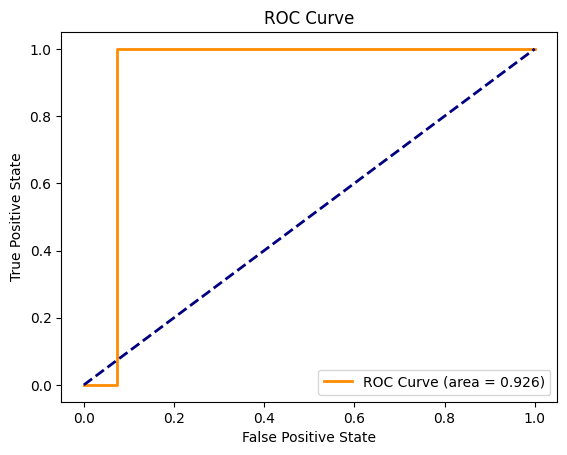

In [305]:
plot_roc(fprs, tprs, auc)

Above, we are plotting the ROC curve for our best logistic regression model and the test dataset. We also calculated the AUC of the ROC curve as well, which was 0.926. Looking at our test ROC and AUC, it is saying that our best logistic regression model's ability to classify the observations in the test dataset is extremely well. 1 is the highest test ROC and AUC score possible, and and since our model's ROC and AUC score is close to 1 (0.926), our model performs extremely well. 

Next, we are use our ROC curve to select a predictive probability threshold that best meets our research goal. In our research goal, we are trying to have a high true positive rate, and as such, we will use a high predictive probability threshold. In this scenario, we will be using a threshold of 0.7. After creating the threshold, we are then going to look at and analize the test FPR and TPR of the classification that would be created using this predictive probability threshold.

In [306]:
df_test["y_hat"] = 1 * (df_test["predictive prob"] >= 0.7)
df_test[["is_superstar", "y_hat", "predictive prob"]].head()

,is_superstar,y_hat,predictive prob
66,0,0,1.529244e-02
130,0,0,1.302266e-09
153,0,0,6.281507e-09
123,0,0,7.817218e-09
31,0,0,1.854227e-01


In [307]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true = df_test["is_superstar"], y_pred = df_test["y_hat"]).ravel()
(tn, fp, fn , tp)

(25, 2, 0, 2)

In [308]:
TPR = tp / (tp + fn)
TPR

1.0

In [309]:
FPR = fp / (fp + tn)
FPR

0.07407407407407407

The percent of actual superstars in the test dataset that were accurately classified as superstars was 100% (TPR).
The percent of non-superstars in the test dataset that were inaccurately classified as superstars was ~7.41% (FPR).

## 8. Additional Analysis/Insight

For our additional analysis with this dataset we looked to find our log-likelihood function value with our training dataset given our final model. We can find this value in our summary table for our final model but we can also find the same value by using our log_loss function after importing it from sklearn.metrics. The higher our log-likelihood value is, the stronger and more accurate our model will be and helps visualize the overall strength of our model. By finding our log-likelihood value, we have an additional way to further answer our main research goal and see how good of a fit our final model is in meeting our research goal.

In [310]:
final_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           is_superstar   No. Observations:                  112
Model:                          Logit   Df Residuals:                      108
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.6592
Time:                        22:36:51   Log-Likelihood:                -17.912
converged:                       True   LL-Null:                       -52.553
Covariance Type:            nonrobust   LLR p-value:                 6.084e-15
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.2407      2.636     -3.126      0.002     -13.408      -3.073
POSG[T.True]    -0.2867      0.917     -0.313      0.755      -2.085       1.511
APG              0.8348      0.519      1.607      0.108      -0.183       1.853
MPG              6.8354      2.466      2.772      0.006       2.003      11.668
================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [311]:
phat_train = final_mod1.predict(df_train)
phat_train

23     6.706978e-01
73     4.222146e-02
129    7.638772e-10
128    8.914788e-09
131    4.185109e-09
           ...     
93     5.296552e-06
109    2.218645e-05
71     1.292545e-05
26     7.259308e-02
9      9.099786e-01
Length: 112, dtype: float64

In [312]:
from sklearn.metrics import log_loss

In [313]:
-log_loss(df_train['is_superstar'], phat_train)*len(df_train['is_superstar'])

-17.912081320264402

Our LLF for our final model is -17.912081320264402. This shows that our final model is a good fit for predicting superstars, since a higher LLF value (the closer it is to 0), means that the better the models performance. Since our value is pretty close to 0, this means that our performance is pretty good. This helps further our research goal, since we hope to yield reliable interpretive insights, which directly relates to how good of a fit our model is.

## 9. Conclusion

When it comes to building a predictive model that will effectivley predict superstar status for new datasets, given our best selected model, we would recommend this model to sports analysts, agents for players, and NBA managers. This is because our average test AUC score was extremely high at a value of .97 which is close to the maximum score of 1. We don't believe that our final model yields the highest possible average test AUC score out of all possible models we can create with this dataset. In order to have a more "complete" analysis we could have potentially expanded our dataset to regular season or used more variables. This would make our best model even more accurate and optimally achieve our research goals. Some shortcomings we had were alternatively using a different selection feature such as forward selection with cross-validation. This would make it much quicker and easier for us to find our best model. When it comes to future work, an idea we have is to include more explanatory variables or more relevant statistics/variables that we believe would be influential research goals, since we had a lot of overfitting variables in the end.

## References

Raman, R. (2023, October 6). The art of the NBA rebuild shifting after new CBA. Technique. https://nique.net/sports/2023/10/06/the-art-of-the-nba-rebuild-shifting-after-new-cba/ 

McGowan, C. (2020, June 24). Suspended indefinitely: Allan Houston punches the Clock. RealGM. https://basketball.realgm.com/article/257894/Suspended-Indefinitely-Allan-Houston-Punches-The-Clock 